<a href="https://colab.research.google.com/github/kn9ck/MAT422/blob/master/HW_3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic regression
**Logistic regression** is used for binary classification, where the target variable $ b_i $ is either 0 or 1. The model uses a logistic function (sigmoid function) to map a linear combination of input features to a probability value.



### The Logistic (Sigmoid) Function
The **sigmoid function** $\sigma(t)$ transforms any real number into a probability between 0 and 1:

$\sigma(t) = \frac{1}{1 + e^{-t}}$

The derivative is: $\sigma'(t) = \sigma(t)(1 - \sigma(t))$

For input features $\alpha$ and parameters $x$: $p(\alpha; x) = \sigma(\alpha^T x)$



In [56]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

### Logit Function
The logistic model expresses the log-odds $$\log\frac{p(\alpha; x)}{1 - p(\alpha; x)} = \alpha^T x$$ as a linear function of the features.

Where $p(\alpha; x)$ is the probability of label 1
$\alpha^T x$ is the linear combination of features and parameters.

This relationship means that a unit increase in a feature leads to a constant change in the log-odds of the outcome, making the model interpretable.


### Loss Function (Cross-entropy)
The loss function $$\ell(x; A, b) = -\frac{1}{n}\sum_{i=1}^n[b_i\log(\sigma(\alpha_i^T x)) + (1-b_i)\log(1-\sigma(\alpha_i^T x))]$$ measures how well our predictions match the true labels.

$n$ is the number of samples
$b_i$ are the true labels
$\sigma(\alpha_i^T x)$ are the predicted probabilities

This function penalizes confident wrong predictions more heavily than less confident ones, encouraging the model to be both accurate and well-calibrated.

In [57]:
def compute_loss(X, y, weights): #cross entropy loss
    n_samples = len(y)
    z = np.dot(X, weights)
    predictions = sigmoid(z)

    epsilon = 1e-15
    loss = (-1/n_samples) * np.sum(
        y * np.log(predictions + epsilon) +
        (1 - y) * np.log(1 - predictions + epsilon)
    )
    return loss

### Gradient
The gradient $$\nabla_x\ell(x; A, b) = -\frac{1}{n}\sum_{i=1}^n(b_i - \sigma(\alpha_i^T x))\alpha_i$$ tells us how to adjust our parameters to reduce prediction errors. Each term in the sum represents the prediction error $(b_i - \sigma(\alpha_i^T x))$ weighted by the corresponding feature vector $\alpha_i$.

In [58]:
def compute_gradient(X, y, weights):
    n_samples = len(y)
    z = np.dot(X, weights)
    predictions = sigmoid(z)
    gradient = (-1/n_samples) * np.dot(X.T, (y - predictions))

    return gradient

### Gradient Descent Algorithm

The update rule $$x_{k+1} = x_k + \beta\frac{1}{n}\sum_{i=1}^n(b_i - \sigma(\alpha_i^T x_k))\alpha_i$$ iteratively improves our parameter estimates. At each step, we move in the direction that reduces our prediction errors, with step size $\beta$ controlling how aggressively we update.

In [59]:
def logistic_regression(X, y, epochs, learning_rate): # gradient descent
    n_features = X.shape[1]
    weights = np.zeros(n_features)
    loss_history = []
    for epoch in range(epochs):
        gradient = compute_gradient(X, y, weights)
        weights -= learning_rate * gradient

        if epoch % 100 == 0:
            loss = compute_loss(X, y, weights)
            loss_history.append(loss)
            print(f"epoch {epoch}: Loss = {loss:.4f}")

    return weights, loss_history

### Stochastic Gradient Descent
Stochastic gradient descent updates parameters using a single random sample at each step: $$x_{k+1} = x_k + \beta(b_I - \sigma(\alpha_I^T x_k))\alpha_I$$
This approach is computationally more efficient than full gradient descent while still converging to the optimal solution in expectation.

In [60]:
def stochastic_logistic_regression(X, y, epochs, learning_rate): #SGD
    weights = np.zeros(X.shape[1])
    loss_history = []
    for epoch in range(epochs):
        random_idx = np.random.randint(0, len(y))
        X_i = X[random_idx:random_idx+1]
        y_i = y[random_idx:random_idx+1]
        gradient = compute_gradient(X_i, y_i, weights)
        weights -= learning_rate * gradient
        if epoch % 100 == 0:
            loss = compute_loss(X, y, weights)
            loss_history.append(loss)
            print(f"epoch {epoch}: loss = {loss:.4f}")

    return weights, loss_history

epoch 0: Loss = 0.6721
epoch 100: Loss = 0.1518
epoch 200: Loss = 0.0891
epoch 300: Loss = 0.0647
epoch 400: Loss = 0.0515
epoch 500: Loss = 0.0431
epoch 600: Loss = 0.0373
epoch 700: Loss = 0.0330
epoch 800: Loss = 0.0297
epoch 900: Loss = 0.0270
weights: [0.01889579 1.11729117 1.12186045]


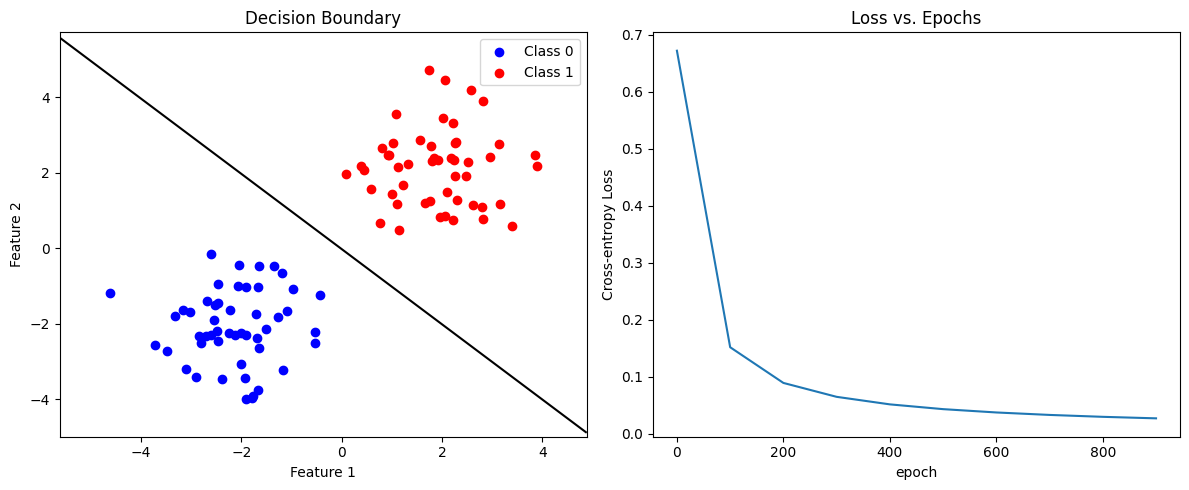


prediction probabilities:
[0.03422972 0.99637683]

predicted classes:
[0 1]


In [61]:
def predict_proba(X,  weights):
    z = np.dot(X, weights)
    return sigmoid(z)

def predict(X, weights):
    return (predict_proba(X, weights) >= 0.5).astype(int)

def plot(X, weights):
    plt.figure(figsize=(12, 5))

    #plot training data and decision boundary
    plt.subplot(1, 2, 1)
    x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
    X_test = np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()]
    Z = predict_proba(X_test, weights)
    Z = Z.reshape(xx.shape)

    plt.contour(xx, yy, Z, levels=[0.5], colors='k')
    plt.scatter(X[y==0, 1], X[y==0, 2], c='blue', label='Class 0')
    plt.scatter(X[y==1, 1], X[y==1, 2], c='red', label='Class 1')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.legend()

    #plot loss
    plt.subplot(1, 2, 2)
    plt.plot(range(0, 1000, 100), loss)
    plt.xlabel('epoch')
    plt.ylabel('Cross-entropy Loss')
    plt.title('Loss vs. Epochs')

    plt.tight_layout()
    plt.show()



np.random.seed(42)
n_samples = 100

#create two clusters of points
X_class0 = np.random.normal(loc=[-2, -2], scale=1, size=(n_samples//2, 2))
X_class1 = np.random.normal(loc=[2, 2], scale=1, size=(n_samples//2, 2))
X = np.vstack([X_class0, X_class1])

X = np.hstack([np.ones((n_samples, 1)), X])
y = np.hstack([np.zeros(n_samples//2), np.ones(n_samples//2)])

weights, loss = logistic_regression(X,y, epochs=1000, learning_rate=0.01)
print("weights:", weights)

plot(X, weights)


X_test = np.array([
    [1, -1.5, -1.5],  #ground truth = 0
    [1, 2.5, 2.5],    #ground truth = 1
])

#predict
print("\nprediction probabilities:")
print(predict_proba(X_test, weights))
print("\npredicted classes:")
print(predict(X_test, weights))

epoch 0: loss = 0.6839
epoch 100: loss = 0.1502
epoch 200: loss = 0.0875
epoch 300: loss = 0.0643
epoch 400: loss = 0.0511
epoch 500: loss = 0.0426
epoch 600: loss = 0.0367
epoch 700: loss = 0.0323
epoch 800: loss = 0.0290
epoch 900: loss = 0.0265
weights with SGD: [0.03251258 1.12194288 1.12949505]


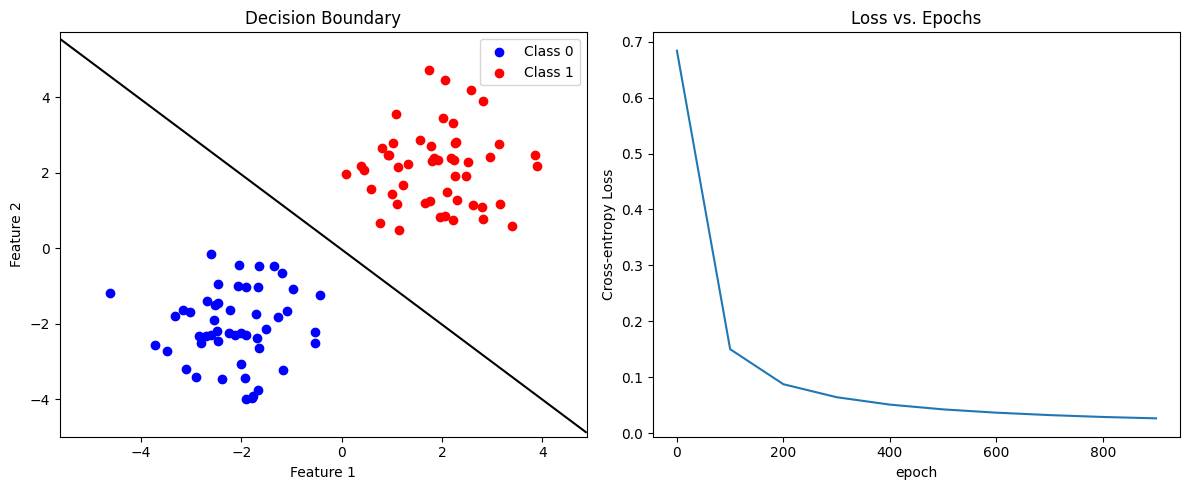


prediction probabilities:
[0.03407098 0.9965334 ]

predicted classes:
[0 1]


In [62]:
#train with SGD
weights_sgd, loss = stochastic_logistic_regression(X, y, 1000, 0.01)
print("weights with SGD:", weights_sgd)

plot(X, weights_sgd)

X_test = np.array([
    [1, -1.5, -1.5],  #ground truth = 0
    [1, 2.5, 2.5],    #ground truth = 1
])

#predict
print("\nprediction probabilities:")
print(predict_proba(X_test, weights_sgd))
print("\npredicted classes:")
print(predict(X_test, weights_sgd))
